In [12]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import gaussian

In [41]:
segm_file = '/home/adrian/workspace/ilastik-datasets/Vladyslav/Nuclei_08_segment_correct.h5'
raw_file = '/home/adrian/workspace/ilastik-datasets/Vladyslav/vlad_nuclei_inside.h5'
out_file = '/home/adrian/workspace/ilastik-datasets/Vladyslav/nuclei_08_gt.h5'

with h5py.File(segm_file, 'r') as f:
    label = f['label'][21:137, 600:1800, 330:1650]
    label = (label > 0).astype('uint8')
    with h5py.File(raw_file, 'r') as g:
        raw = g['raw'][21:137, 600:1800, 330:1650]
        with h5py.File(out_file, 'w') as h:
            h.create_dataset('label', data=label, compression='gzip')
            h.create_dataset('raw', data=raw, compression='gzip')

1


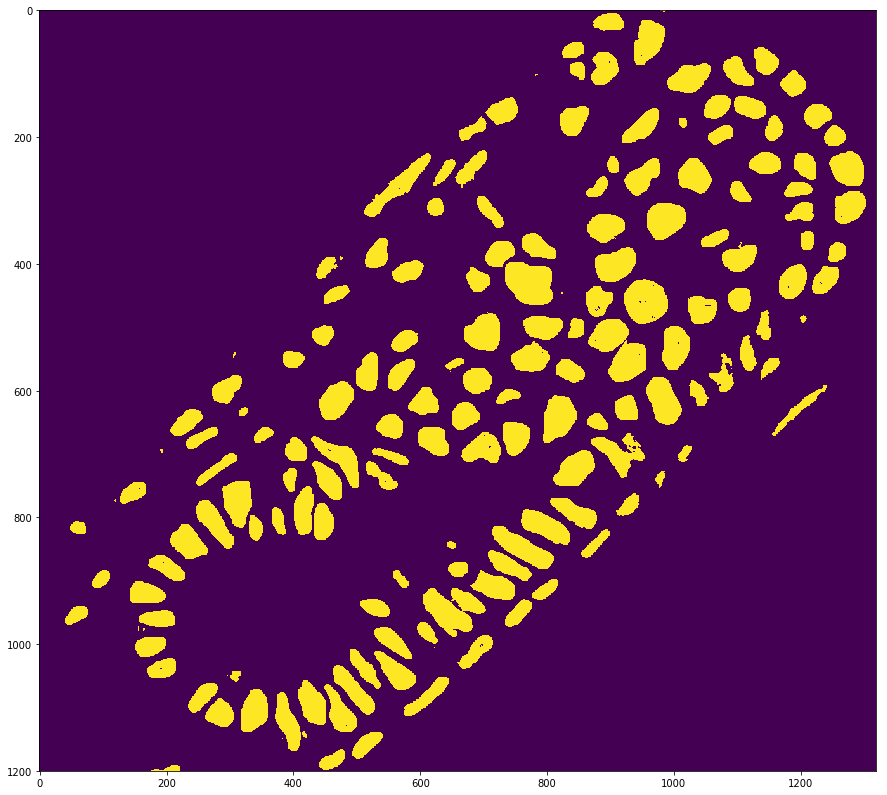

In [42]:
plt.figure(figsize=(15,15))
plt.imshow(label[60])
print(np.max(label))

In [47]:
in_file = '/home/adrian/workspace/ilastik-datasets/Vladyslav/nuclei_08_gt.h5'
gt_train = '/home/adrian/workspace/ilastik-datasets/Vladyslav/nuclei_08_gt_train.h5'
val_train = '/home/adrian/workspace/ilastik-datasets/Vladyslav/nuclei_08_gt_val.h5'

with h5py.File(in_file, 'r') as f:
    raw = f['raw'][...]
    label = f['label'][...]
    
    train_raw = []
    val_raw = []
    
    train_label = []
    val_label = []
    
    for i in range(raw.shape[0]):
        if i % 3 == 0:
            val_raw.append(raw[i])
            val_label.append(label[i])
        else:
            train_raw.append(raw[i])
            train_label.append(label[i])
            
    t_raw = np.stack(train_raw, axis=0)
    v_raw = np.stack(val_raw, axis=0)
    
    t_label = np.stack(train_label, axis=0)
    v_label = np.stack(val_label, axis=0)
    
    with h5py.File(gt_train, 'w') as g:
        g.create_dataset('raw', data=t_raw, compression='gzip')
        g.create_dataset('label', data=t_label, compression='gzip')
        
    with h5py.File(val_train, 'w') as h:
        h.create_dataset('raw', data=v_raw, compression='gzip')
        h.create_dataset('label', data=v_label, compression='gzip')